# Who Rides Buses in San Diego
San Diego is an affluent city in Southern California where many people use private cars as their main form of transportation. This project will test the hypothesis that richer regions will have less public transportation compared to poorer regions. The idea being that poorer region will have a greater need for public transportation because they don't have the access to private transport. 

In [1]:
#the necessary libraries for the project
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import rcParams, cycler
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from descartes import PolygonPatch
%matplotlib inline

## Data Import
All of the data can be found on https://www.sandag.org/index.asp?subclassid=100&fuseaction=home.subclasshome. 

## SRA dataset
The first dataset is a shape file that has the regions of San Diego

In [2]:
sd=gpd.read_file('sd/SRA2010tiger.shp')
sd.head()

,SRA,NAME,geometry
0,1,CENTRAL SAN DIEGO,"POLYGON ((6291831.391 1858989.066, 6291888.145..."
1,2,PENINSULA,"POLYGON ((6271747.439 1857616.573, 6271950.162..."
2,3,CORONADO,"POLYGON ((6268054.353 1841291.322, 6268044.000..."
3,4,NATIONAL CITY,"POLYGON ((6306396.166 1832843.706, 6306426.305..."
4,5,SOUTHEASTERN SAN DIEGO,"POLYGON ((6314723.469 1847708.327, 6314773.270..."


## Transit Stops dataset
The second dataset consists of all public transportation stops along with its coordinates

In [3]:
stops=gpd.read_file('stops/TRANSIT_STOPS_GTFS.shp')
stops.head()

,stop_UID,stop_agenc,stop_id,stop_name,stop_lat,stop_lon,stop_code,location_t,parent_sta,wheelchair,intersecti,stop_place,geometry
0,MTS_10001,MTS,10001,Cabrillo National Monument,32.674458,-117.240426,10001,0,None,1.0,M-Special_Loc,cabmon,POINT (6256889.649 1826625.236)
1,MTS_10003,MTS,10003,Pearl St & Draper Av,32.839578,-117.276187,10003,0,None,1.0,N-E/B,None,POINT (6246476.647 1886807.228)
2,MTS_10004,MTS,10004,Pearl St & Fay Av,32.840128,-117.273810,10004,0,None,1.0,N-E/B,None,POINT (6247208.647 1887000.229)
3,MTS_10006,MTS,10006,Torrey Pines Rd & Exchange Pl,32.845847,-117.268673,10006,0,None,1.0,N-N/B,None,POINT (6248806.647 1889065.228)
4,MTS_10007,MTS,10007,Torrey Pines Rd & Princess St,32.848826,-117.262585,10007,0,None,0.0,N-E/B,None,POINT (6250686.846 1890130.828)


## Reorganizing the regional dataset
Taking the information that is relavent for this project and indexing the data by the regions name
and creating datapoints within the polygons that can be uses as labels

In [4]:
sd=sd.set_index('NAME')
sd=sd['geometry']
sd=gpd.GeoDataFrame(sd)
sd['name']=sd.index
sd['coords']=sd['geometry'].apply(lambda x: x.representative_point().coords[:])
sd['coords']=[coords[0] for coords in sd['coords']]
sd.head()

,geometry,name,coords
NAME,,,
CENTRAL SAN DIEGO,"POLYGON ((6291831.391 1858989.066, 6291888.145...",CENTRAL SAN DIEGO,"(6290221.671509825, 1830285.6744002746)"
PENINSULA,"POLYGON ((6271747.439 1857616.573, 6271950.162...",PENINSULA,"(6254833.313371377, 1840138.253865768)"
CORONADO,"POLYGON ((6268054.353 1841291.322, 6268044.000...",CORONADO,"(6287326.418408884, 1817681.8561909879)"
NATIONAL CITY,"POLYGON ((6306396.166 1832843.706, 6306426.305...",NATIONAL CITY,"(6293724.137005491, 1816668.7777681183)"
SOUTHEASTERN SAN DIEGO,"POLYGON ((6314723.469 1847708.327, 6314773.270...",SOUTHEASTERN SAN DIEGO,"(6310594.047174487, 1835437.8894085847)"


## Mapping the regional data

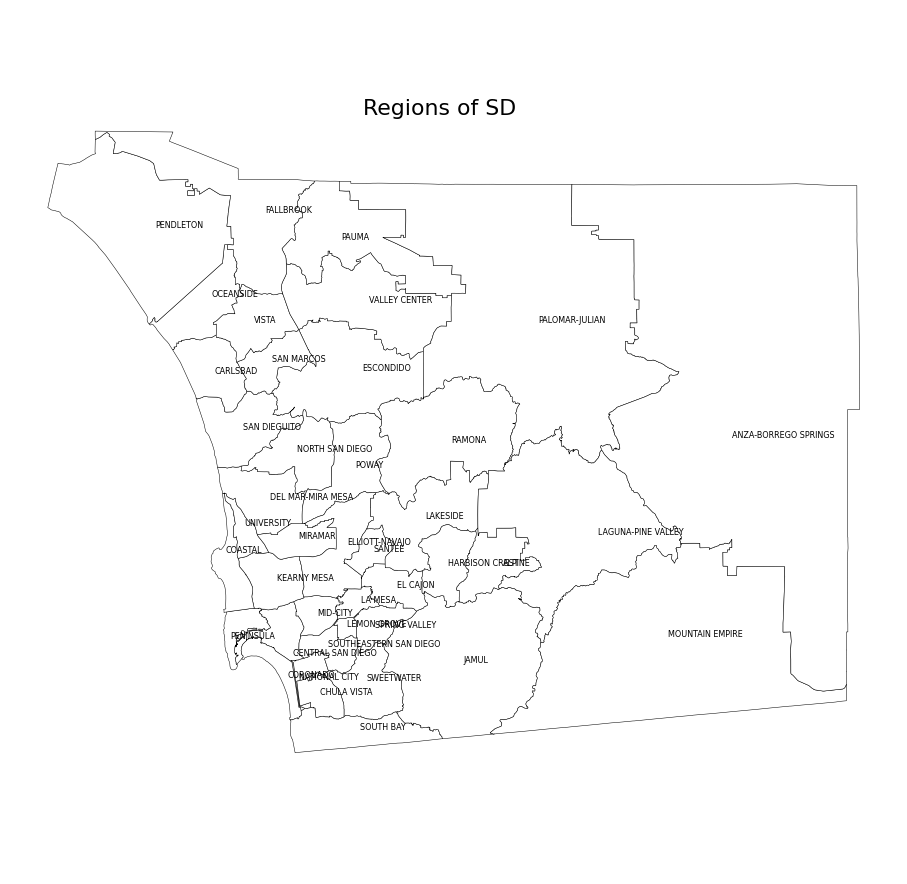

In [5]:
f, ax =plt.subplots(1,figsize=(16,16))
ax=sd.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5)
for i,row in sd.iterrows():
    plt.annotate(s=row['name'],xy=row['coords'],size=8)
ax.set_axis_off()
f.suptitle('Regions of SD', y=.8, size=22)
lims = plt.axis('equal')
plt.show()

## Remapping
The intial label references of the polygons were hard to read. Fine tuning is necessary for legibility. Additional format changes also makes the map easier to read. 

In [6]:
sd.at['ALPINE', 'coords'] = (6403045.105085528, 1882106.9990557968)
sd.at['CORONADO', 'coords'] = (6262326.418408884, 1817681.8561909879)
sd.at['COASTAL', 'coords'] = (6247817.291522433, 1882226.7601902098)
sd.at['CENTRAL SAN DIEGO', 'coords'] = (6268221.671509825, 1840285.6744002746)
sd.at['CHULA VISTA', 'coords'] = (6300778.26018921, 1807986.3391587087)
sd.at['EL CAJON', 'coords'] = (6339622.501558527, 1869481.152999695)
sd.at['ELLIOTT-NAVAJO', 'coords'] = (6301621.057964147, 1883526.5532442178)
sd.at['HARBISON CREST', 'coords'] = (6372636.491865171, 1889711.5971227642)
sd.at['KEARNY MESA', 'coords'] = (6261151.989977902, 1873022.552211917)
sd.at['LA MESA', 'coords'] = (6322102.8914588895, 1860583.349439395)
sd.at['LEMON GROVE', 'coords'] = (6311203.660066389, 1847315.6769021226)
sd.at['MID-CITY', 'coords'] = (6300062.756346282, 1853335.7281125123)
sd.at['NATIONAL CITY', 'coords'] = (6293724.137005491, 1824668.7777681183)
sd.at['PENINSULA', 'coords'] = (6250833.313371377, 1849138.253865768)
sd.at['SOUTHEASTERN SAN DIEGO', 'coords'] = (6306594.047174487, 1835437.8894085847)
sd.at['SPRING VALLEY', 'coords'] = (6337474.537914956, 1842599.1056217588)
sd.at['SWEETWATER', 'coords'] = (6322126.235793577, 1816341.9997309532)

## 41 regions
Many of the regions are concentrated around downtown San Diego. 
Regions fruther from the center are noticably bigger. 

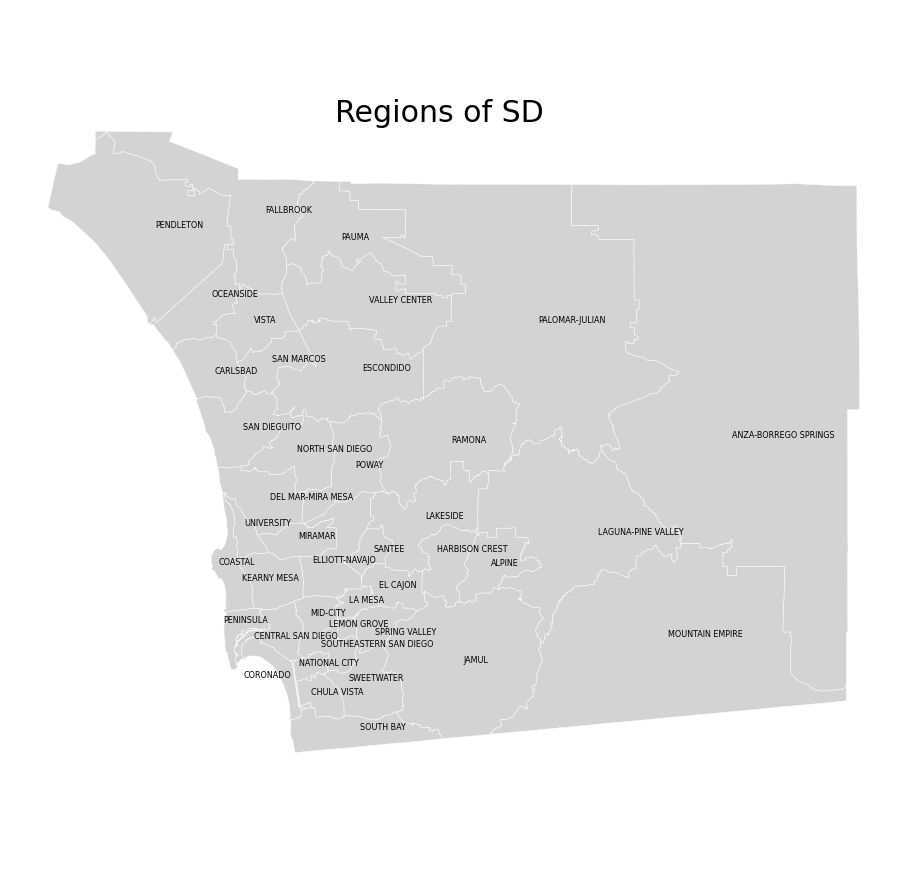

In [7]:
plt.rc('axes',titlesize=22)
f, ax =plt.subplots(1,figsize=(16,16))
ax=sd.plot(ax=ax,color='lightgrey',edgecolor='white',linewidth=0.5)
for i,row in sd.iterrows():
    plt.annotate(s=row['name'],xy=row['coords'],size=8)
ax.set_axis_off()
f.suptitle('Regions of SD', y=.8, size=30)
lims = plt.axis('equal')
plt.show()

## Public Transport Stops
Along the coast and in downtown there is much more public transport

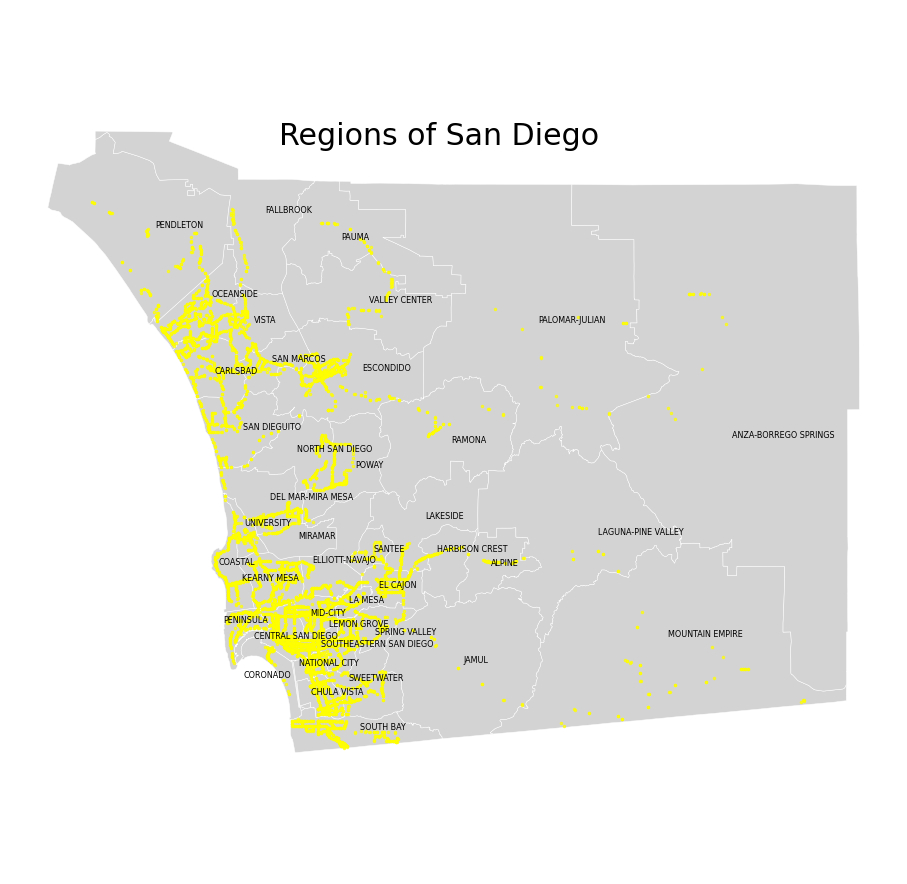

In [8]:
f, ax =plt.subplots(1,figsize=(16,16))
ax=sd.plot(ax=ax,color='lightgrey',edgecolor='white',linewidth=0.5)
for i,row in sd.iterrows():
    plt.annotate(s=row['name'],xy=row['coords'],size=8)
stops.plot(ax=ax,markersize=6,alpha=.7,color='yellow')
ax.set_axis_off()
f.suptitle('Regions of San Diego', y=.78, size=30)
lims = plt.axis('equal')
plt.show()

## Joing regional and transport data
With a spacial join of the regional data to the transport data we will have a dataframe that has all the 
transport data and regional data in one place. This is done by each Point observation being matched within a Polygon
observation and combing the information. This type of joining will keep all the data from both previous sets of data except the Polygon geometry column. 

In [9]:
stops_sd=gpd.sjoin(stops,sd,how='inner',op='within')
stops_sd.head()

C:\Users\jesse\miniconda3\envs\tensorflow\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:2230'} != None)
  "(%s != %s)" % (left_df.crs, right_df.crs)


,stop_UID,stop_agenc,stop_id,stop_name,stop_lat,stop_lon,stop_code,location_t,parent_sta,wheelchair,intersecti,stop_place,geometry,index_right,name,coords
0,MTS_10001,MTS,10001,Cabrillo National Monument,32.674458,-117.240426,10001,0,None,1.0,M-Special_Loc,cabmon,POINT (6256889.649 1826625.236),PENINSULA,PENINSULA,"(6250833.313371377, 1849138.253865768)"
10,MTS_10020,MTS,10020,Voltaire St & Mendocino St,32.745067,-117.235749,10020,0,None,1.0,N-E/B,None,POINT (6258571.647 1852301.233),PENINSULA,PENINSULA,"(6250833.313371377, 1849138.253865768)"
12,MTS_10024,MTS,10024,Voltaire St & San Clemente St,32.742869,-117.233536,10024,0,None,1.0,N-E/B,None,POINT (6259244.647 1851495.234),PENINSULA,PENINSULA,"(6250833.313371377, 1849138.253865768)"
14,MTS_10026,MTS,10026,Chatsworth Bl & Tennyson St,32.738147,-117.229704,10026,0,None,1.0,N-N/B,None,POINT (6260406.647 1849766.234),PENINSULA,PENINSULA,"(6250833.313371377, 1849138.253865768)"
15,MTS_10027,MTS,10027,Voltaire St & Poinsettia Dr,32.740256,-117.229295,10027,0,None,1.0,N-E/B,volpoi,POINT (6260539.647 1850532.234),PENINSULA,PENINSULA,"(6250833.313371377, 1849138.253865768)"


## Counting public tranport stops by region
From the newly created dataframe we can quickly count how many stops are in each region. 

In [10]:
hoods=pd.DataFrame(stops_sd.name.value_counts())
hoods=hoods.rename(columns={'name':'num_stops'})
hoods=hoods.sort_index()
hoods.head()

,num_stops
ALPINE,33
ANZA-BORREGO SPRINGS,19
CARLSBAD,285
CENTRAL SAN DIEGO,490
CHULA VISTA,260


## Population data
From the same source we can upload census data from 2010. Luckily SanDag is consisent with its regions which will make
it easy to combine this data with the other datasets. 

In [11]:
xls=pd.ExcelFile('pop.xlsx')
pop=pd.read_excel(xls, sheet_name=0)
pop.head()

,SRA,Name,TotalPop,Hispanic,White,Black,AmerIndian,Asian,Hawaii/PacIslander,Other,TwoPlus,TotUnits,OccUnits,VacUnits
0,1,Central San Diego,165573,57622,82293,11482,678,8068,431,444,4555,84931,76684,8247
1,2,Peninsula,62936,8196,47963,2099,274,2018,191,291,1904,28022,26263,1759
2,3,Coronado,24697,3354,17914,1527,151,884,93,38,736,9634,7409,2225
3,4,National City,58318,37135,6793,2559,165,10120,420,45,1081,16598,15326,1272
4,5,Southeastern San Diego,155805,78276,14899,25878,295,30313,1512,256,4376,43906,41802,2104


## Population Data Editing 
We will index this data and keep the only column of interest

In [12]:
pop['Name']=pop['Name'].str.upper()
pop=pop.set_index('Name')
pop=pop['TotalPop']
pop=pd.DataFrame(pop)
pop=pop.sort_index()
pop.head()

,TotalPop
Name,
ALPINE,15035
ANZA-BORREGO SPRINGS,4440
CARLSBAD,114712
CENTRAL SAN DIEGO,165573
CHULA VISTA,115234


## Checking for identical indexes
With population data transportation stops data sharing the same index it will be easy to concatenate the data in one new dataset.

In [13]:
pop.index==hoods.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## Concatenating the data

In [14]:
pop_stop=pd.concat([hoods,pop],axis=1)
pop_stop.head()

,num_stops,TotalPop
Name,,
ALPINE,33,15035
ANZA-BORREGO SPRINGS,19,4440
CARLSBAD,285,114712
CENTRAL SAN DIEGO,490,165573
CHULA VISTA,260,115234


## Adding a stop/population ratio
With this ratio we can see which regions have relatively many or few stops in relation to population

In [15]:
pop_stop=pd.concat([hoods,pop],axis=1)
pop_stop['ratio']=pop_stop.num_stops/pop_stop.TotalPop
pop_stop=pop_stop.sort_values('ratio')
pop_stop=pd.DataFrame(pop_stop)
pop_stop.head()

,num_stops,TotalPop,ratio
Name,,,
FALLBROOK,38,47304,0.000803
SANTEE,53,51151,0.001036
POWAY,100,86311,0.001159
JAMUL,22,18958,0.001160
SWEETWATER,158,135320,0.001168


## Adding region wealth. 
I chose to measure a regions wealth by it's median income from the same 2010 census. In order to get this inforation I had to follow http://datasurfer.sandag.org/dataoverview for each of the 41 regions. 

In [16]:
pop_stop.loc['ALPINE','median_income']=81782
pop_stop.loc['ANZA-BORREGO SPRINGS','median_income']=46640
pop_stop.loc['CARLSBAD','median_income']=80084
pop_stop.loc['CENTRAL SAN DIEGO','median_income']=47487
pop_stop.loc['CHULA VISTA','median_income']=43230
pop_stop.loc['COASTAL','median_income']=76819
pop_stop.loc['CORONADO','median_income']=89702
pop_stop.loc['DEL MAR-MIRA MESA','median_income']=104199
pop_stop.loc['EL CAJON','median_income']=49978
pop_stop.loc['ELLIOTT-NAVAJO','median_income']=76027
pop_stop.loc['ESCONDIDO','median_income']=55466
pop_stop.loc['FALLBROOK','median_income']=65057
pop_stop.loc['HARBISON CREST','median_income']=75213
pop_stop.loc['JAMUL','median_income']=108200
pop_stop.loc['KEARNY MESA','median_income']=62395
pop_stop.loc['LA MESA','median_income']=54133
pop_stop.loc['LAGUNA-PINE VALLEY','median_income']=58346
pop_stop.loc['LAKESIDE','median_income']=64877
pop_stop.loc['LEMON GROVE','median_income']=53607
pop_stop.loc['MID-CITY','median_income']=41142
pop_stop.loc['MIRAMAR','median_income']=40174
pop_stop.loc['MOUNTAIN EMPIRE','median_income']=53092
pop_stop.loc['NATIONAL CITY','median_income']=37062
pop_stop.loc['NORTH SAN DIEGO','median_income']=94948
pop_stop.loc['OCEANSIDE','median_income']=63213
pop_stop.loc['PALOMAR-JULIAN','median_income']=51155
pop_stop.loc['PAUMA','median_income']=66853
pop_stop.loc['PENDLETON','median_income']=46650
pop_stop.loc['PENINSULA','median_income']=61021
pop_stop.loc['POWAY','median_income']=105844
pop_stop.loc['RAMONA','median_income']=79172
pop_stop.loc['SAN DIEGUITO','median_income']=92099
pop_stop.loc['SAN MARCOS','median_income']=58488
pop_stop.loc['SANTEE','median_income']=70955
pop_stop.loc['SOUTH BAY','median_income']=48692
pop_stop.loc['SOUTHEASTERN SAN DIEGO','median_income']=50644
pop_stop.loc['SPRING VALLEY','median_income']=67509
pop_stop.loc['SWEETWATER','median_income']=87381
pop_stop.loc['UNIVERSITY','median_income']=67204
pop_stop.loc['VALLEY CENTER','median_income']=75996
pop_stop.loc['VISTA','median_income']=54693
pop_stop.head()

,num_stops,TotalPop,ratio,median_income
Name,,,,
FALLBROOK,38,47304,0.000803,65057.0
SANTEE,53,51151,0.001036,70955.0
POWAY,100,86311,0.001159,105844.0
JAMUL,22,18958,0.001160,108200.0
SWEETWATER,158,135320,0.001168,87381.0


## Sorting the data
By sorting the data by ratio of stops to population and then by median income I was able to creat 4 lists. Two lists with the 10 highest and 10 lowest ratio of stops by population and the 10 richest and 10 poorest regions.

In [17]:
pop_stop=pop_stop.sort_values('ratio')
#pop_stop

In [18]:
pop_stop=pop_stop.sort_values('median_income')
#pop_stop

In [19]:
low=sd.loc[['NATIONAL CITY','MIRAMAR','MID-CITY','CHULA VISTA','ANZA-BORREGO SPRINGS',
            'PENDLETON','CENTRAL SAN DIEGO','SOUTH BAY','EL CAJON','SOUTHEASTERN SAN DIEGO']]
low=gpd.GeoDataFrame(low)
high=sd.loc[['JAMUL','POWAY','DEL MAR-MIRA MESA','NORTH SAN DIEGO','SAN DIEGUITO',
             'CORONADO','SWEETWATER','ALPINE','CARLSBAD','RAMONA']]
high=gpd.GeoDataFrame(high)
few=sd.loc[['FALLBROOK','SANTEE','POWAY','JAMUL','SWEETWATER',
            'DEL MAR-MIRA MESA','NORTH SAN DIEGO','LAKESIDE','RAMONA','ELLIOTT-NAVAJO']]
few=gpd.GeoDataFrame(few)
many=sd.loc[['COASTAL','PENDLETON','KEARNY MESA','CENTRAL SAN DIEGO',
             'PALOMAR-JULIAN','NATIONAL CITY','PENINSULA','PAUMA','ANZA-BORREGO SPRINGS','MOUNTAIN EMPIRE']]
many=gpd.GeoDataFrame(many)

## Correct Predictions
Rich regions with few stops and the poor regions with many stops will be considered a correct assumption. 

In [20]:
correct=sd.loc[['NATIONAL CITY','ANZA-BORREGO SPRINGS','PENDLETON','CENTRAL SAN DIEGO','JAMUL',
                'POWAY','DEL MAR-MIRA MESA','NORTH SAN DIEGO','SWEETWATER']]
correct=gpd.GeoDataFrame(correct)

## New labels for the new lists
Here a new column for the labels is made and fine tuning of label location is made for legibility

In [21]:
low['coords']=low['geometry'].apply(lambda x: x.representative_point().coords[:])
low['coords']=[coords[0] for coords in low['coords']]
low['name']=low.index
high['coords']=high['geometry'].apply(lambda x: x.representative_point().coords[:])
high['coords']=[coords[0] for coords in high['coords']]
high['name']=high.index
few['coords']=few['geometry'].apply(lambda x: x.representative_point().coords[:])
few['coords']=[coords[0] for coords in few['coords']]
few['name']=few.index
many['coords']=many['geometry'].apply(lambda x: x.representative_point().coords[:])
many['coords']=[coords[0] for coords in many['coords']]
many['name']=many.index
correct['coords']=correct['geometry'].apply(lambda x: x.representative_point().coords[:])
correct['coords']=[coords[0] for coords in correct['coords']]
correct['name']=correct.index

In [22]:
high.at['CORONADO', 'coords'] = (6262326.418408884, 1817681.8561909879)
high.at['SWEETWATER', 'coords'] = (6322126.235793577, 1816341.9997309532)
low.at['EL CAJON', 'coords'] = (6339622.501558527, 1869481.152999695)
low.at['CHULA VISTA', 'coords'] = (6300778.26018921, 1807986.3391587087)
low.at['CENTRAL SAN DIEGO', 'coords'] = (6268221.671509825, 1840285.6744002746)
low.at['NATIONAL CITY', 'coords'] = (6293724.137005491, 1824668.7777681183)
few.at['SWEETWATER', 'coords'] = (6322126.235793577, 1816341.9997309532)
many.at['CENTRAL SAN DIEGO', 'coords'] = (6268221.671509825, 1840285.6744002746)
many.at['NATIONAL CITY', 'coords'] = (6293724.137005491, 1824668.7777681183)
few.at['ELLIOTT-NAVAJO', 'coords'] = (6301621.057964147, 1883526.5532442178)
correct.at['CENTRAL SAN DIEGO', 'coords'] = (6268221.671509825, 1840285.6744002746)
correct.at['NATIONAL CITY', 'coords'] = (6293724.137005491, 1824668.7777681183)
correct.at['SWEETWATER', 'coords'] = (6322126.235793577, 1816341.9997309532)

## Map comparing top the 10 richest regions agains the 10 poorest regions

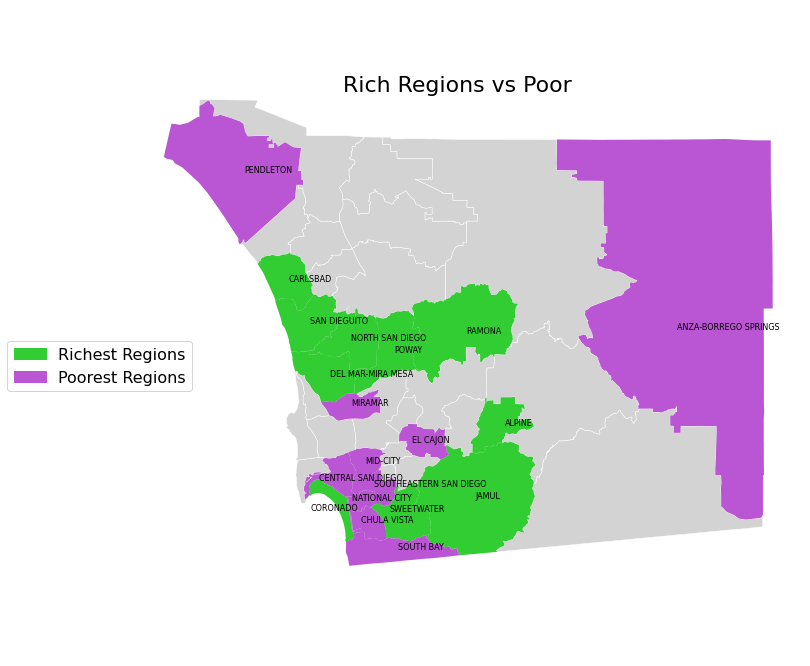

In [23]:
f, ax =plt.subplots(1,figsize=(12,12))
ax=sd.plot(ax=ax,color='lightgrey',edgecolor='white',linewidth=0.5)
high.plot(ax=ax, color='limegreen')
low.plot(ax=ax, color='mediumorchid')
for i,row in low.iterrows():
    plt.annotate(s=row['name'],xy=row['coords'],size=8)
for i,row in high.iterrows():
    plt.annotate(s=row['name'],xy=row['coords'],size=8)
ax.set_axis_off()
f.suptitle('Rich Regions vs Poor',y=.8,size=22)
lims = plt.axis('equal')
h=mpatches.Patch(color='limegreen', label= 'Richest Regions')
l=mpatches.Patch(color='mediumorchid',label='Poorest Regions')
plt.legend(handles=[h,l],bbox_to_anchor=(.1,.5),fontsize=16)

## Map comparing the regions with relatively high number of bus vs low

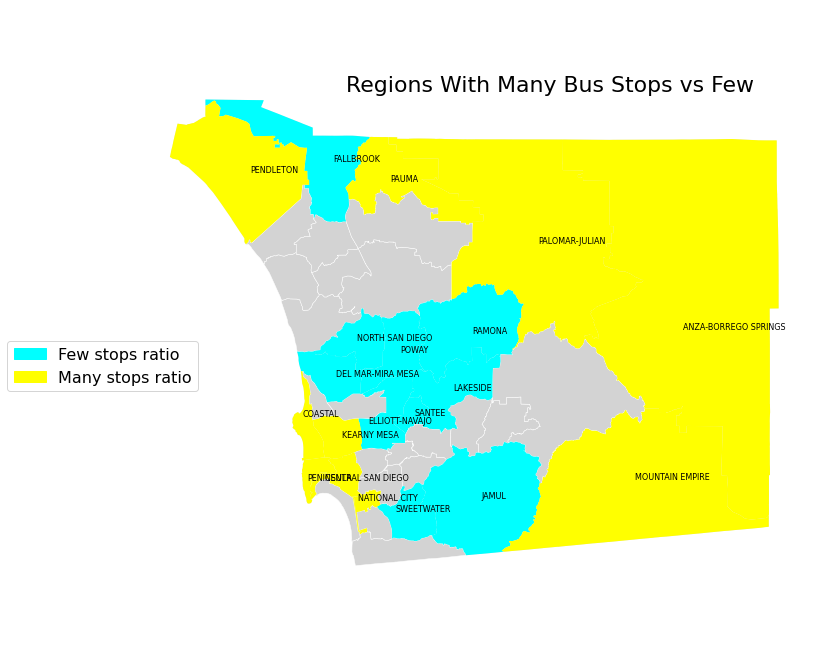

In [24]:
f, ax =plt.subplots(1,figsize=(12,12))
ax=sd.plot(ax=ax,color='lightgrey',edgecolor='white',linewidth=0.5)
few.plot(ax=ax, color='aqua')
many.plot(ax=ax, color='yellow')
for i,row in few.iterrows():
    plt.annotate(s=row['name'],xy=row['coords'],size=8)
for i,row in many.iterrows():
    plt.annotate(s=row['name'],xy=row['coords'],size=8)
ax.set_axis_off()
f.suptitle('Regions With Many Bus Stops vs Few',x=.6,y=.8,size=22)
lims = plt.axis('equal')
f=mpatches.Patch(color='aqua', label= 'Few stops ratio')
m=mpatches.Patch(color='yellow',label='Many stops ratio')
plt.legend(handles=[f,m],bbox_to_anchor=(.1,.5),fontsize=16)

## The regions where my assumptions were correct

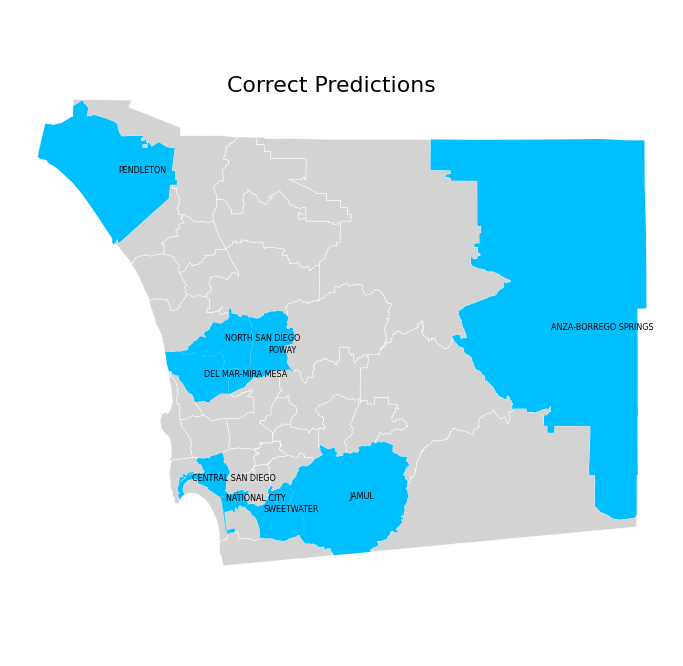

In [25]:
f, ax =plt.subplots(1,figsize=(12,12))
ax=sd.plot(ax=ax,color='lightgrey',edgecolor='white',linewidth=0.5)
correct.plot(ax=ax, color='deepskyblue')
for i,row in correct.iterrows():
    plt.annotate(s=row['name'],xy=row['coords'],size=8)
ax.set_axis_off()
f.suptitle('Correct Predictions',y=.8,size=22)
lims = plt.axis('equal')

## Conclusion
Regional wealth seems to be a weak indicator for the quantity of public transportation. Furthermore, some of the richest regions are some of the most remote and some of the poorest regions are small and centrally located. Geography and populations size would seem to be better indicators on the prediction of public transportation quantity than wealth. 